In [4]:
testname="fib"

In [5]:
import pandas as pd
import numpy as np
import json
def convert(x,y,z):
    name = x+str(y)
    temp = pd.DataFrame(z)
    temp.rename(columns = {'duration':name+'duration', 'billed':name+'billed', 'memoryUsed':name+'memory_used'},inplace = True)
    temp["id"]=tuple(range(1, 101, 1))
    return temp
original = pd.read_json('../results/'+testname+'.json')
result = [convert(x, y,z) for x, y,z in zip(original['architecture'], original['memory'],original['testResult'])]
dfs = [df.set_index('id') for df in result]
converted = pd.concat(dfs,axis=1)
converted

,ARM1024duration,ARM1024billed,ARM1024memory_used,ARM2048duration,ARM2048billed,ARM2048memory_used,ARM512duration,ARM512billed,ARM512memory_used,x861024duration,x861024billed,x861024memory_used,x862048duration,x862048billed,x862048memory_used,x86512duration,x86512billed,x86512memory_used
id,,,,,,,,,,,,,,,,,,
1,1007.36,1008,62,598.49,599,61,2087.13,2088,61,775.38,776,63,639.23,640,63,2240.74,2241,63
2,1001.65,1002,62,577.93,578,61,2068.09,2069,61,785.18,786,63,640.69,641,63,2232.01,2233,63
3,1001.95,1002,62,579.40,580,62,2050.09,2051,62,773.75,774,63,637.65,638,64,2238.27,2239,64
4,998.68,999,62,578.54,579,62,2064.79,2065,62,768.88,769,63,639.04,640,64,2224.68,2225,64
5,1003.12,1004,62,578.37,579,62,2080.76,2081,62,765.35,766,64,646.63,647,64,2232.54,2233,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,996.78,997,66,578.43,579,65,2034.46,2035,65,768.14,769,67,633.21,634,68,2207.90,2208,67
97,1004.18,1005,66,577.01,578,65,2039.73,2040,65,757.77,758,67,631.80,632,68,2207.13,2208,67
98,997.13,998,66,580.02,581,65,2041.74,2042,65,770.45,771,67,634.44,635,68,2217.53,2218,67


In [6]:
durations = converted.filter(regex="duration", axis=1)
durations.mean()


ARM1024duration    1002.3988
ARM2048duration     578.1294
ARM512duration     2048.2560
x861024duration     770.0743
x862048duration     642.1544
x86512duration     2226.1817
dtype: float64

<AxesSubplot:xlabel='id'>

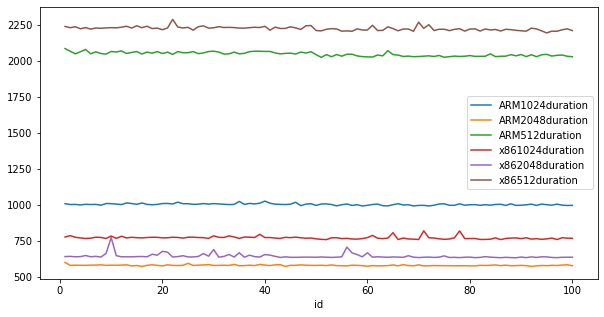

In [7]:
durations.plot(figsize=(10,5))

In [11]:
durations.std()

ARM1024duration     9.818871
ARM2048duration     5.428726
ARM512duration     18.911535
x861024duration    12.731248
x862048duration     4.618133
x86512duration     21.232432
dtype: float64

In [4]:
armDuration = durations["ARM2048duration"]
x86Duration = durations["x862048duration"]

series = np.array([1000000,10000000,20000000,30000000,40000000,50000000])
create_two_series = lambda x : np.array([x*580*0.0000000267, x*445*0.0000000333,x*1024*0.0000000133,x*1106*0.0000000167]).reshape(-1,1)
cost = np.array(list(map(create_two_series,series))).reshape(-1,4)
cost


array([[ 15.486 ,  14.8185,  13.6192,  18.4702],
       [154.86  , 148.185 , 136.192 , 184.702 ],
       [309.72  , 296.37  , 272.384 , 369.404 ],
       [464.58  , 444.555 , 408.576 , 554.106 ],
       [619.44  , 592.74  , 544.768 , 738.808 ],
       [774.3   , 740.925 , 680.96  , 923.51  ]])

In [5]:
tostr = lambda x : str(x)
costdf = pd.DataFrame(cost,columns=['ARM-2048','x86-2048','ARM-1024','x86-1024'],index=list(map(tostr,series)))
costdf

,ARM-2048,x86-2048,ARM-1024,x86-1024
1000000,15.486,14.8185,13.6192,18.4702
10000000,154.860,148.1850,136.1920,184.7020
20000000,309.720,296.3700,272.3840,369.4040
30000000,464.580,444.5550,408.5760,554.1060
40000000,619.440,592.7400,544.7680,738.8080
50000000,774.300,740.9250,680.9600,923.5100
